# 01 - Data Exploration and Feature Engineering

## AF Phenotype Discovery from ILR Data

### Clinical Background

The **NEXAF Trial** (Norwegian Exercise and Atrial Fibrillation) is a randomized controlled trial led by NTNU and St. Olav's Hospital investigating how moderate physical activity affects patients with atrial fibrillation (AF). Current exercise recommendations for AF patients are limited, leaving physicians and patients uncertain about appropriate activity levels. The study examines how activity aligned with general health guidelines impacts quality of life, AF symptom severity, and episode frequency over 12 months.

An **Implantable Loop Recorder (ILR)** is a small subcutaneous device that provides continuous cardiac monitoring. Unlike short-term Holter monitors, ILRs capture every AF episode with precise timestamps and durations over extended periods, enabling detailed characterization of individual AF patterns.

**Study Data Sources:**
- **Baseline assessments**: Cardiopulmonary exercise testing (CPET), echocardiography and more.
- **Continuous monitoring**: ILR episode data throughout the study period
- **Outcomes**: Hospitalization events and other clinical events
- **Quality of Life**: AFEQT questionnaires at baseline, 6 months, and 12 months (365 days post-implantation)

### Study Overview

| Metric | Value |
|--------|-------|
| Patients | 295 with ILR devices |
| AF Episodes | 170,181 total |
| Follow-up | Up to 365 days |
| Outcomes | Hospitalization, Quality of Life (AFEQT) |

---

## Variable Reference

### Raw Episode Variables (Input Data)

| Variable | Description | Unit |
|----------|-------------|------|
| `ID` | Patient identifier | - |
| `af_episode_minutes` | Duration of AF episode | minutes |
| `time_start_ep` | Episode start timestamp | datetime |
| `days_since_implant` | Days from ILR implant to episode | days |
| `episode_start_during_day` | Time of day category (night/morning/afternoon/evening) | category |
| `AF_MEAN_RR_INTERVAL_msec` | Mean RR interval during AF | ms |
| `AF_MEAN_RR_RATE_bpm` | Mean ventricular rate during AF | bpm |

### Extracted Features (118 Total)

#### Burden Features (28)
| Variable | Description | Unit |
|----------|-------------|------|
| `total_af_minutes` | Total AF duration over follow-up | minutes |
| `total_af_hours` | Total AF duration | hours |
| `total_af_days` | Total AF duration | days |
| `follow_up_days` | Length of patient follow-up | days |
| `af_burden_percent` | % of follow-up time in AF | % |
| `af_burden_rate_per_day` | Average AF minutes per day | min/day |
| `af_burden_rate_per_week` | Average AF minutes per week | min/week |
| `burden_first_half` | AF burden in first half of follow-up | minutes |
| `burden_second_half` | AF burden in second half of follow-up | minutes |
| `burden_ratio_second_first` | Ratio of second/first half burden | ratio |
| `burden_q1` to `burden_q4` | AF burden by follow-up quartile | minutes |
| `burden_first_30d` | AF burden in first 30 days | minutes |
| `burden_after_30d` | AF burden after first 30 days | minutes |
| `burden_minutes_X_Yd` | Burden in time window X-Y days | minutes |
| `burden_rate_X_Yd` | Burden rate in time window | min/day |
| `time_to_25/50/75pct_burden` | Days to reach burden milestone | days |

#### Episode Pattern Features (30)
| Variable | Description | Unit |
|----------|-------------|------|
| `n_episodes` | Total number of AF episodes | count |
| `episode_rate_per_week` | Average episodes per week | count/week |
| `episode_rate_per_month` | Average episodes per month | count/month |
| `mean_episode_duration` | Mean duration of episodes | minutes |
| `median_episode_duration` | Median duration of episodes | minutes |
| `max/min_episode_duration` | Max/min episode duration | minutes |
| `std_episode_duration` | Standard deviation of duration | minutes |
| `cv_episode_duration` | Coefficient of variation of duration | ratio |
| `skew_episode_duration` | Skewness of duration distribution | - |
| `duration_p25/p75/p90` | Duration percentiles | minutes |
| `duration_iqr` | Interquartile range of duration | minutes |
| `pct_episodes_lt_1h` | % of episodes < 1 hour | % |
| `pct_episodes_1h_24h` | % of episodes 1-24 hours | % |
| `pct_episodes_gt_24h` | % of episodes > 24 hours | % |
| `pct_episodes_gt_7d` | % of episodes > 7 days | % |
| `n_episodes_gt_1h/24h` | Count of long episodes | count |
| `mean_inter_episode_interval` | Mean time between episodes | days |
| `median_inter_episode_interval` | Median time between episodes | days |
| `std_inter_episode_interval` | SD of inter-episode interval | days |
| `cv_inter_episode_interval` | CV of inter-episode interval | ratio |
| `burstiness_index` | Episode clustering (-1=periodic, 0=random, 1=bursty) | index |
| `pct_intervals_lt_1d/7d` | % of intervals < 1/7 days | % |
| `fano_factor_weekly` | Variance/mean of weekly episode counts | ratio |

#### Temporal Pattern Features (14)
| Variable | Description | Unit |
|----------|-------------|------|
| `n_daytime_episodes` | Episodes starting 06:00-23:59 | count |
| `n_nighttime_episodes` | Episodes starting 00:00-05:59 | count |
| `pct_daytime_episodes` | % of episodes in daytime | % |
| `day_night_ratio` | Ratio of daytime to nighttime episodes | ratio |
| `burden_pct_daytime` | % of burden occurring in daytime | % |
| `burden_pct_nighttime` | % of burden occurring at night | % |
| `peak_hour` | Circular mean hour of episode onset | hour (0-24) |
| `hourly_concentration` | Concentration of hourly distribution (0=uniform, 1=single hour) | index |
| `hourly_entropy` | Entropy of hourly distribution | bits |
| `hourly_entropy_normalized` | Normalized hourly entropy (0-1) | ratio |
| `pct_weekend_episodes` | % of episodes on weekends | % |
| `weekday_weekend_ratio` | Normalized weekday vs weekend rate | ratio |
| `dow_entropy` | Entropy of day-of-week distribution | bits |
| `monthly_entropy` | Entropy of monthly distribution | bits |

#### RR Interval / Heart Rate Features (21)
| Variable | Description | Unit |
|----------|-------------|------|
| `n_episodes_with_rr` | Episodes with RR data available | count |
| `pct_episodes_with_rr` | % of episodes with RR data | % |
| `mean_rr_interval` | Mean RR interval during AF | ms |
| `median_rr_interval` | Median RR interval | ms |
| `std_rr_interval` | SD of RR interval | ms |
| `min/max_rr_interval` | Min/max RR interval | ms |
| `cv_rr_interval` | CV of RR interval | ratio |
| `range_rr_interval` | Range of RR intervals | ms |
| `mean_ventricular_rate` | Mean heart rate during AF | bpm |
| `median_ventricular_rate` | Median heart rate | bpm |
| `std_ventricular_rate` | SD of heart rate | bpm |
| `min/max_ventricular_rate` | Min/max heart rate | bpm |
| `pct_rapid_af` | % with HR > 110 bpm (RR < 545 ms) | % |
| `pct_controlled_af` | % with HR 60-110 bpm | % |
| `pct_slow_af` | % with HR < 60 bpm | % |
| `pct_very_rapid_af` | % with HR > 150 bpm | % |
| `duration_weighted_mean_rr` | Duration-weighted mean RR | ms |
| `rr_duration_correlation` | Correlation between RR and duration | r |

#### Trajectory Shape Features (24)
| Variable | Description | Unit |
|----------|-------------|------|
| `trajectory_slope` | Linear slope of cumulative burden | min/day |
| `trajectory_intercept` | Intercept of linear fit | minutes |
| `trajectory_r_squared` | R² of linear fit | ratio |
| `trajectory_quadratic_coef` | Quadratic coefficient (curvature) | min/day² |
| `trajectory_linear_coef` | Linear coefficient from quadratic fit | min/day |
| `trajectory_convexity` | Sign of curvature (+1=accelerating, -1=decelerating) | sign |
| `slope_q1` to `slope_q4` | Burden slope by follow-up quartile | min/day |
| `slope_change_ratio` | Ratio of Q4/Q1 slope (trajectory evolution) | ratio |
| `has_plateau` | Whether trajectory has plateau period | boolean |
| `longest_plateau_episodes` | Length of longest plateau | count |
| `plateau_onset_days` | Day when plateau began | days |
| `time_to_25/50/75pct_burden` | Days to reach burden milestone | days |
| `n_major_steps` | Episodes contributing >10% of burden | count |
| `max_step_size_minutes` | Largest single episode | minutes |
| `max_step_size_pct` | Largest episode as % of total burden | % |
| `top3_episode_contribution_pct` | % of burden from top 3 episodes | % |
| `trajectory_auc_normalized` | Normalized AUC (higher=earlier burden) | ratio |

---

### This Notebook

1. Load and explore the ILR episode data
2. Clean and validate episodes
3. Align to time-since-implant
4. Extract 118 patient-level features
5. Prepare data for phenotype clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.preprocessing import AFDataLoader, EpisodeCleaner, TimeAligner
from src.features import FeatureAggregator

# Display settings
pd.set_option('display.max_columns', 50)
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 120
%matplotlib inline

---
## 1. Load Data

We have three main data sources:
- **Episodes**: Individual AF episode records from ILR
- **Burden**: Summary AF burden and outcomes
- **Baseline**: Demographics and comorbidities

In [2]:
# Initialize data loader
loader = AFDataLoader()

# Load datasets
df_episodes = loader.load_episodes()
df_burden = loader.load_burden()

print("=" * 50)
print("DATA SUMMARY")
print("=" * 50)
print(f"\nEpisode Data:")
print(f"  Total episodes: {len(df_episodes):,}")
print(f"  Unique patients: {df_episodes['ID'].nunique()}")
print(f"  Columns: {len(df_episodes.columns)}")

print(f"\nBurden/Outcome Data:")
print(f"  Patients: {len(df_burden)}")
print(f"  Variables: {len(df_burden.columns)}")

DATA SUMMARY

Episode Data:
  Total episodes: 170,181
  Unique patients: 294
  Columns: 25

Burden/Outcome Data:
  Patients: 294
  Variables: 1155


In [3]:
# Episode data structure
print("Episode Data Columns:")
print("-" * 30)
key_cols = ['ID', 'af_episode_minutes', 'time_start_ep', 'episode_start_during_day', 
            'rr_interval_of_longest_af', 'days_since_implant']
available_cols = [c for c in key_cols if c in df_episodes.columns]
for col in available_cols:
    dtype = df_episodes[col].dtype
    n_valid = df_episodes[col].notna().sum()
    print(f"  {col}: {dtype} ({n_valid:,} valid)")

Episode Data Columns:
------------------------------
  ID: float64 (163,463 valid)
  af_episode_minutes: float64 (170,181 valid)
  time_start_ep: datetime64[ns] (170,160 valid)
  episode_start_during_day: object (170,181 valid)


In [4]:
# Sample of episode data
print("\nSample Episodes:")
df_episodes[available_cols].head(10)


Sample Episodes:


,ID,af_episode_minutes,time_start_ep,episode_start_during_day
0,2020.0,4.233333,2023-02-14 13:06:24,afternoon 12-17:59
1,2020.0,2.833333,2023-02-14 13:12:18,afternoon 12-17:59
2,2020.0,6.466667,2023-02-24 02:46:10,night 00-05:59
3,2020.0,6.750000,2023-02-24 09:52:00,morning 6-11:59
4,2020.0,1.433333,2023-02-25 00:45:52,night 00-05:59
5,2020.0,7.000000,2023-02-28 09:26:08,morning 6-11:59
6,2020.0,3.416667,2023-03-02 09:14:50,morning 6-11:59
7,2020.0,3.100000,2023-03-02 11:00:58,morning 6-11:59
8,2020.0,14.216667,2023-03-02 11:42:12,morning 6-11:59
9,2020.0,1.633333,2023-03-02 12:03:46,afternoon 12-17:59


---
## 2. Episode Data Quality

Before analysis, we need to:
- Remove invalid episodes (zero/negative duration)
- Handle extreme outliers
- Validate RR interval data

In [5]:
# Episode duration statistics
duration_col = 'af_episode_minutes'

print("Episode Duration Statistics (minutes):")
print("-" * 40)
print(df_episodes[duration_col].describe())

print(f"\nEpisodes:")
print(f"  Zero duration: {(df_episodes[duration_col] == 0).sum():,}")
print(f"  Negative duration: {(df_episodes[duration_col] < 0).sum():,}")
print(f"  Missing duration: {(df_episodes[duration_col].isna()).sum():,}")
print(f"  < 6 minutes: {(df_episodes[duration_col] <= 6).sum():,}")
print(f"  > 6 minutes: {(df_episodes[duration_col] > 6).sum():,}")
print(f"  > 1 hour: {(df_episodes[duration_col] > 60).sum():,}")
print(f"  > 24 hours: {(df_episodes[duration_col] > 1440).sum():,}")
print(f"  > 7 days: {(df_episodes[duration_col] > 10080).sum():,}")

Episode Duration Statistics (minutes):
----------------------------------------
count    170181.000000
mean         78.640101
std        1113.648871
min           0.000000
25%           1.516667
50%           4.200000
75%          17.550000
max      142555.733333
Name: af_episode_minutes, dtype: float64

Episodes:
  Zero duration: 21
  Negative duration: 0
  Missing duration: 0
  < 6 minutes: 97,314
  > 6 minutes: 72,867
  > 1 hour: 20,357
  > 24 hours: 1,296
  > 7 days: 112


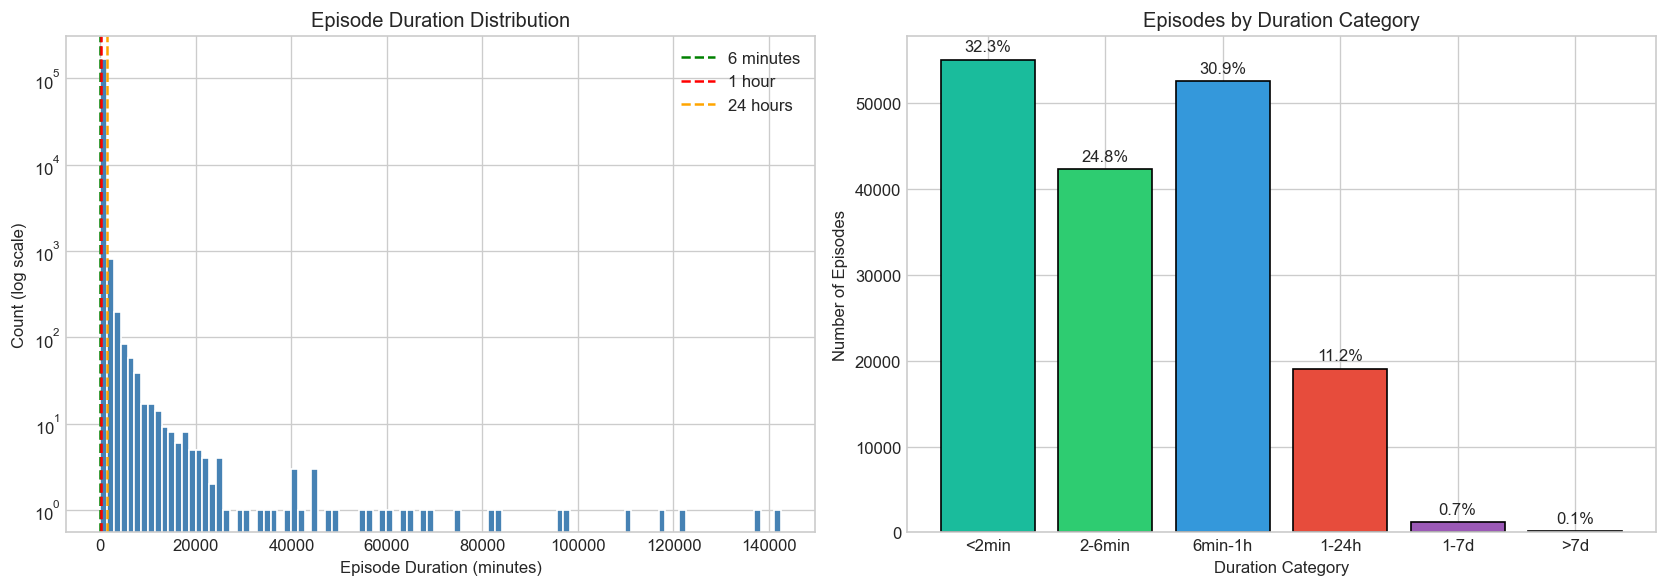

In [6]:
# Visualize episode duration distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Log-scale histogram
duration_valid = df_episodes[duration_col].dropna()
duration_valid = duration_valid[duration_valid > 0]

axes[0].hist(duration_valid, bins=100, log=True, color='steelblue', edgecolor='white')
axes[0].axvline(6, color='green', linestyle='--', label='6 minutes')
axes[0].axvline(60, color='red', linestyle='--', label='1 hour')
axes[0].axvline(1440, color='orange', linestyle='--', label='24 hours')
axes[0].set_xlabel('Episode Duration (minutes)')
axes[0].set_ylabel('Count (log scale)')
axes[0].set_title('Episode Duration Distribution')
axes[0].legend()

# Duration categories
categories = pd.cut(
    duration_valid,
    bins=[0, 2, 6, 60, 1440, 10080, np.inf],
    labels=['<2min', '2-6min', '6min-1h', '1-24h', '1-7d', '>7d']
)
cat_counts = categories.value_counts().sort_index()
colors = ['#1abc9c', '#2ecc71', '#3498db', '#e74c3c', '#9b59b6']
bars = axes[1].bar(cat_counts.index, cat_counts.values, color=colors, edgecolor='black')
axes[1].set_xlabel('Duration Category')
axes[1].set_ylabel('Number of Episodes')
axes[1].set_title('Episodes by Duration Category')

# Add percentages
for bar, count in zip(bars, cat_counts.values):
    pct = 100 * count / len(duration_valid)
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
                 f'{pct:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('../output/figures/episode_duration_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

In [7]:
# Clean episodes
cleaner = EpisodeCleaner(
    min_duration_minutes=2,
    max_duration_minutes=np.inf,
    remove_zero_duration=True,
)

df_clean, cleaning_report = cleaner.clean(df_episodes)

print("=" * 50)
print("CLEANING REPORT")
print("=" * 50)
# EpisodeCleaningReport is a dataclass with a __str__ method
print(cleaning_report)

Removed 21 episodes with zero duration
Removed 54660 episodes with duration < 2 minutes
Removed 1 episodes with invalid RR interval

Final: 115,499 episodes (67.9% retained)
CLEANING REPORT
Episode Cleaning Report
Original episodes:         170,181
Removed (negative dur):    0
Removed (zero duration):   21
Removed (short duration):  54,660
Removed (excessive dur):   0
Removed (missing time):    0
Removed (invalid RR):      1
Removed (overlapping):     0
Final episodes:            115,499
Retention rate:            67.9%
Patients affected:         267


---
## 3. Time Alignment

Align all episodes to **days since ILR implant** for trajectory analysis.
We focus on the first 365 days of follow-up.

In [8]:
# Time alignment
aligner = TimeAligner(
    exclude_pre_implant=True,
    max_follow_up_days=365,
)

df_aligned = aligner.align(df_clean)

print(f"\nAfter time alignment:")
print(f"  Episodes: {len(df_aligned):,}")
print(f"  Patients: {df_aligned['ID'].nunique()}")
print(f"  Retention: {100*len(df_aligned)/len(df_clean):.1f}%")

Excluded 1670 episodes occurring before implant
Excluded 34130 episodes beyond 365 days follow-up
Aligned 79,699 episodes (69.0% of original)

After time alignment:
  Episodes: 79,699
  Patients: 246
  Retention: 69.0%


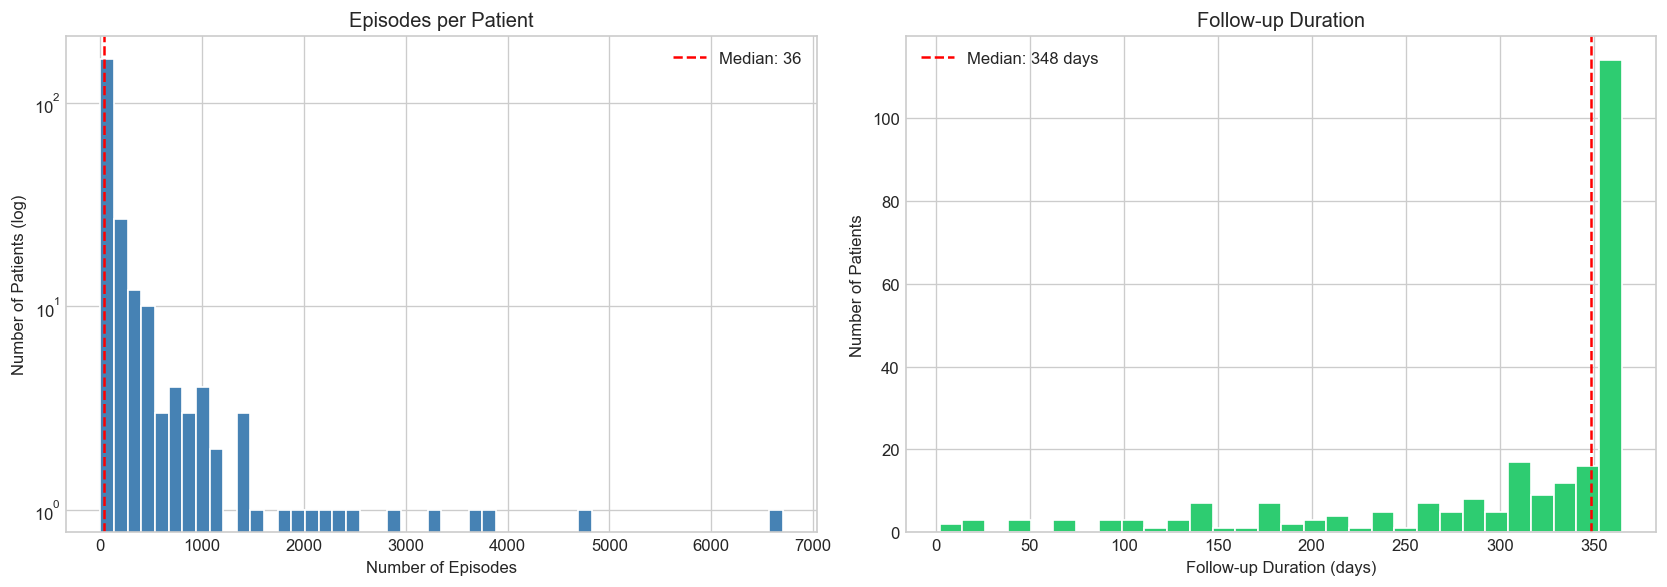


Follow-up Summary:
  Median: 348 days
  Range: 2 - 365 days
  Patients with 365 days: 72


In [9]:
# Follow-up duration per patient
follow_up = df_aligned.groupby('ID')['days_since_implant'].max()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Episodes per patient
episodes_per_patient = df_aligned.groupby('ID').size()
axes[0].hist(episodes_per_patient, bins=50, log=True, color='steelblue', edgecolor='white')
axes[0].axvline(episodes_per_patient.median(), color='red', linestyle='--', 
                label=f'Median: {episodes_per_patient.median():.0f}')
axes[0].set_xlabel('Number of Episodes')
axes[0].set_ylabel('Number of Patients (log)')
axes[0].set_title('Episodes per Patient')
axes[0].legend()

# Follow-up duration
axes[1].hist(follow_up, bins=30, color='#2ecc71', edgecolor='white')
axes[1].axvline(follow_up.median(), color='red', linestyle='--',
                label=f'Median: {follow_up.median():.0f} days')
axes[1].set_xlabel('Follow-up Duration (days)')
axes[1].set_ylabel('Number of Patients')
axes[1].set_title('Follow-up Duration')
axes[1].legend()

plt.tight_layout()
plt.savefig('../output/figures/followup_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFollow-up Summary:")
print(f"  Median: {follow_up.median():.0f} days")
print(f"  Range: {follow_up.min():.0f} - {follow_up.max():.0f} days")
print(f"  Patients with 365 days: {(follow_up >= 360).sum()}")

---
## 4. Day/Night Patterns

ILR data includes timing of episodes, allowing us to analyze circadian patterns.

Episode Timing Distribution:
------------------------------
  morning 6-11:59: 21,227 (26.6%)
  afternoon 12-17:59: 20,345 (25.5%)
  night 00-05:59: 19,340 (24.3%)
  evening 18-23:59: 18,787 (23.6%)


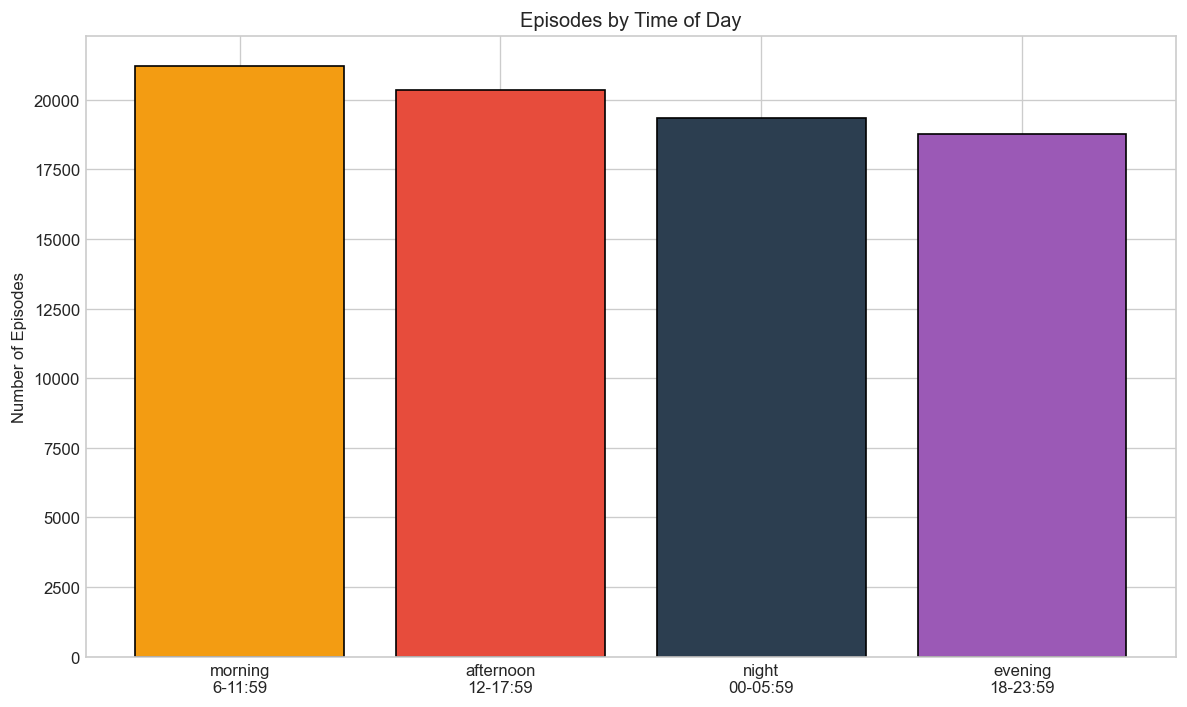

In [10]:
# Day/night distribution
if 'episode_start_during_day' in df_aligned.columns:
    dn_counts = df_aligned['episode_start_during_day'].value_counts()
    print("Episode Timing Distribution:")
    print("-" * 30)
    for timing, count in dn_counts.items():
        pct = 100 * count / len(df_aligned)
        print(f"  {timing}: {count:,} ({pct:.1f}%)")
    
    # Visualize
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = {'night 00-05:59': '#2c3e50', 'morning 6-11:59': '#f39c12',
              'afternoon 12-17:59': '#e74c3c', 'evening 18-23:59': '#9b59b6'}
    bar_colors = [colors.get(str(x), 'gray') for x in dn_counts.index]
    bars = ax.bar(range(len(dn_counts)), dn_counts.values, color=bar_colors, edgecolor='black')
    ax.set_xticks(range(len(dn_counts)))
    ax.set_xticklabels([str(x).replace(' ', '\n') for x in dn_counts.index], rotation=0)
    ax.set_ylabel('Number of Episodes')
    ax.set_title('Episodes by Time of Day')
    
    plt.tight_layout()
    plt.savefig('../output/figures/daynight_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()

---
## 5. Feature Extraction

We extract **118 patient-level features** across 5 domains:

| Domain | Features | Description |
|--------|----------|-------------|
| Burden | 28 | Total AF hours, burden %, time-windowed burden |
| Episodes | 25 | Count, duration stats, inter-episode intervals, burstiness |
| Temporal | 15 | Day/night ratio, circadian entropy, weekend patterns |
| RR Intervals | 20 | Heart rate during AF, % rapid/controlled |
| Trajectory | 30 | Slope, curvature, step detection, AUC |

In [11]:
# Extract all features
aggregator = FeatureAggregator()
features_df = aggregator.extract_all(df_aligned, verbose=True)

print(f"\n" + "=" * 50)
print("FEATURE EXTRACTION COMPLETE")
print("=" * 50)
print(f"  Patients: {len(features_df)}")
print(f"  Features: {len(features_df.columns) - 1}")  # Exclude ID

Extracting burden features...
Extracting episode features...
Extracting temporal features...
Extracting rr features...
Extracting trajectory features...
Extracted 117 features for 246 patients

FEATURE EXTRACTION COMPLETE
  Patients: 246
  Features: 117


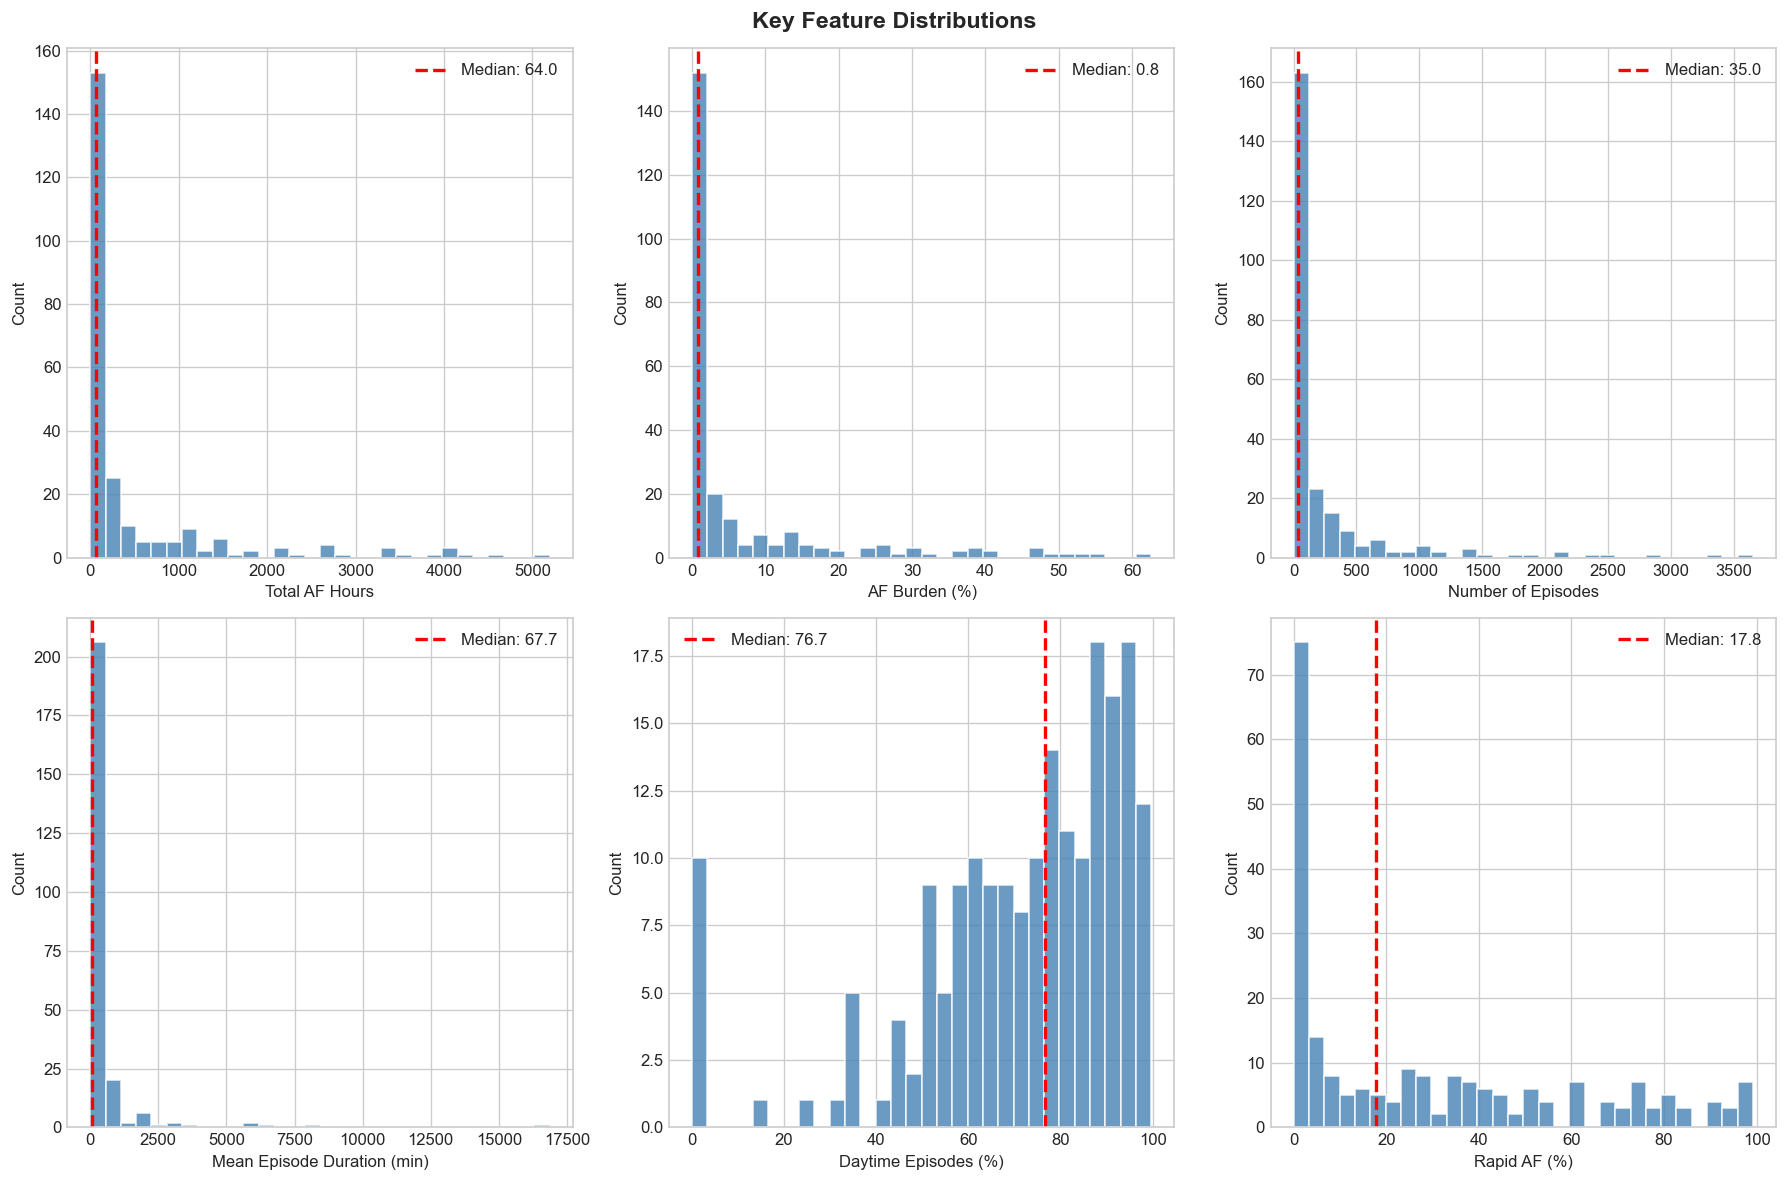

In [12]:
# Key feature distributions
key_features = [
    ('total_af_hours', 'Total AF Hours'),
    ('af_burden_percent', 'AF Burden (%)'),
    ('n_episodes', 'Number of Episodes'),
    ('mean_episode_duration', 'Mean Episode Duration (min)'),
    ('pct_daytime_episodes', 'Daytime Episodes (%)'),
    ('pct_rapid_af', 'Rapid AF (%)')
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, (feat, title) in zip(axes, key_features):
    if feat in features_df.columns:
        data = features_df[feat].dropna()
        data = data[data < data.quantile(0.99)]  # Remove extreme outliers for viz
        ax.hist(data, bins=30, color='steelblue', edgecolor='white', alpha=0.8)
        ax.axvline(data.median(), color='red', linestyle='--', linewidth=2,
                   label=f'Median: {data.median():.1f}')
        ax.set_xlabel(title)
        ax.set_ylabel('Count')
        ax.legend()

plt.suptitle('Key Feature Distributions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../output/figures/feature_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

In [13]:
# Feature summary statistics
summary_features = ['total_af_hours', 'af_burden_percent', 'n_episodes', 
                    'mean_episode_duration', 'pct_daytime_episodes', 'pct_rapid_af',
                    'burstiness_index', 'trajectory_slope']
available_summary = [f for f in summary_features if f in features_df.columns]

print("\nFeature Summary Statistics:")
print("=" * 70)
features_df[available_summary].describe().round(2)


Feature Summary Statistics:


,total_af_hours,af_burden_percent,n_episodes,mean_episode_duration,pct_daytime_episodes,pct_rapid_af,burstiness_index,trajectory_slope
count,246.00,246.00,246.00,246.00,246.00,246.00,246.00,246.00
mean,574.29,7.49,308.43,896.23,77.14,36.13,0.19,152.39
std,1186.84,14.75,767.51,4907.43,24.44,36.64,0.39,355.68
min,0.03,0.00,1.00,2.08,0.00,0.00,-1.00,0.01
25%,7.22,0.12,8.00,11.91,64.21,0.76,0.00,2.37
50%,65.32,0.81,36.00,68.32,84.97,25.27,0.22,13.45
75%,431.50,6.75,229.50,263.98,97.46,66.85,0.43,127.46
max,7436.36,92.74,6701.00,65318.62,100.00,100.00,0.88,3658.36


---
## 6. Save Features for Clustering

The extracted features will be used in the next notebook for phenotype discovery.

In [14]:
# Save features
features_df.to_csv('../output/test_features.csv', index=False)

print("Saved features to: output/test_features.csv")
print(f"  Shape: {features_df.shape}")
print(f"  Ready for phenotype clustering in notebook 02")

Saved features to: output/test_features.csv
  Shape: (246, 118)
  Ready for phenotype clustering in notebook 02
